# SVM 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# Read Data

In [13]:
data = pd.read_csv("FinalData.csv")

In [14]:
data

,Airtemp,Rel.Hum,Rainfall,Leaf_wetness_Hours,Radiation,Bacterial leaf spot,Alternariablight,Powdery mildew,Rhizopusrot,Downy mildew,Girdle beetle
0,25.7,76.0,0.0,0.42,3.000000,0,0,0,0,0,1
1,24.1,83.0,0.2,14.33,186.000000,1,0,0,1,0,0
2,24.5,83.0,0.6,11.33,196.000000,1,0,0,1,0,0
3,23.4,85.0,1.2,11.42,131.000000,0,0,0,1,0,0
4,25.0,78.0,0.0,8.50,259.000000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3515,28.4,40.0,0.0,10.90,151.546572,0,0,0,0,0,0
3516,27.3,54.0,1.0,11.00,151.546572,0,0,0,1,0,0
3517,27.5,48.0,0.4,11.30,151.546572,0,0,0,1,0,0
3518,26.2,40.0,0.0,11.40,151.546572,0,0,0,0,0,0


In [15]:
# features = ['Airtemp', 'Rel.Hum', 'Rainfall', 'Leaf_wetness_Hours','Radiation','Alternariablight']
# class_colors = {0: 'blue', 1: 'red'}  
# sns.pairplot(data=data[features], hue='Alternariablight', palette=class_colors)


# features

In [16]:

features = ['Airtemp', 'Rel.Hum', 'Rainfall', 'Leaf_wetness_Hours','Radiation']

# Splitting data into features (X) and target variable (y)
X = data[features]
# y = data['Bacterial leaf spot']
y = data['Alternariablight']

In [17]:
X

,Airtemp,Rel.Hum,Rainfall,Leaf_wetness_Hours,Radiation
0,25.7,76.0,0.0,0.42,3.000000
1,24.1,83.0,0.2,14.33,186.000000
2,24.5,83.0,0.6,11.33,196.000000
3,23.4,85.0,1.2,11.42,131.000000
4,25.0,78.0,0.0,8.50,259.000000
...,...,...,...,...,...
3515,28.4,40.0,0.0,10.90,151.546572
3516,27.3,54.0,1.0,11.00,151.546572
3517,27.5,48.0,0.4,11.30,151.546572
3518,26.2,40.0,0.0,11.40,151.546572


In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3515    0
3516    0
3517    0
3518    0
3519    0
Name: Alternariablight, Length: 3520, dtype: int64

In [19]:
data['Bacterial leaf spot'].value_counts()

Bacterial leaf spot
0    2719
1     801
Name: count, dtype: int64

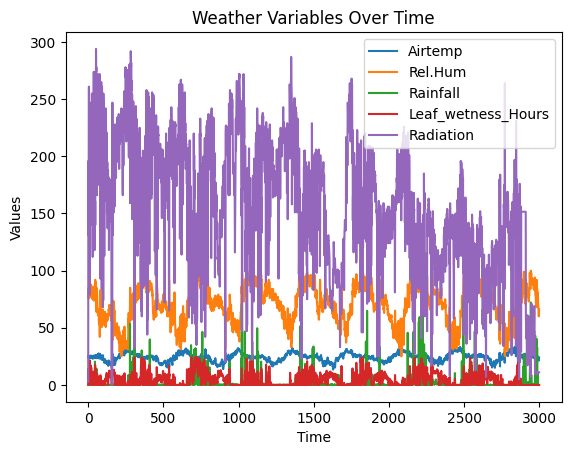

In [20]:

newData = data.head(3000)

plt.plot(newData['Airtemp'], label='Airtemp')
plt.plot(newData['Rel.Hum'], label='Rel.Hum')
plt.plot(newData['Rainfall'], label='Rainfall')
plt.plot(newData['Leaf_wetness_Hours'], label='Leaf_wetness_Hours')
plt.plot(newData['Radiation'], label='Radiation')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Weather Variables Over Time')
plt.legend()
plt.show()

In [21]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)

standardized_data = scaler.transform(X)

In [22]:
X = standardized_data

In [23]:
X

array([[ 0.40714907,  0.32999101, -0.24940437, -0.68118339, -2.55277254],
       [-0.05464076,  0.72934753, -0.21406204,  1.98061634,  0.59208209],
       [ 0.0608067 ,  0.72934753, -0.14337739,  1.4065402 ,  0.76393207],
       ...,
       [ 0.92666261, -1.26743506, -0.17871972,  1.40079944,  0.        ],
       [ 0.55145838, -1.72384251, -0.24940437,  1.41993531,  0.        ],
       [ 0.89780075, -1.38153692, -0.24940437,  1.40079944,  0.        ]])

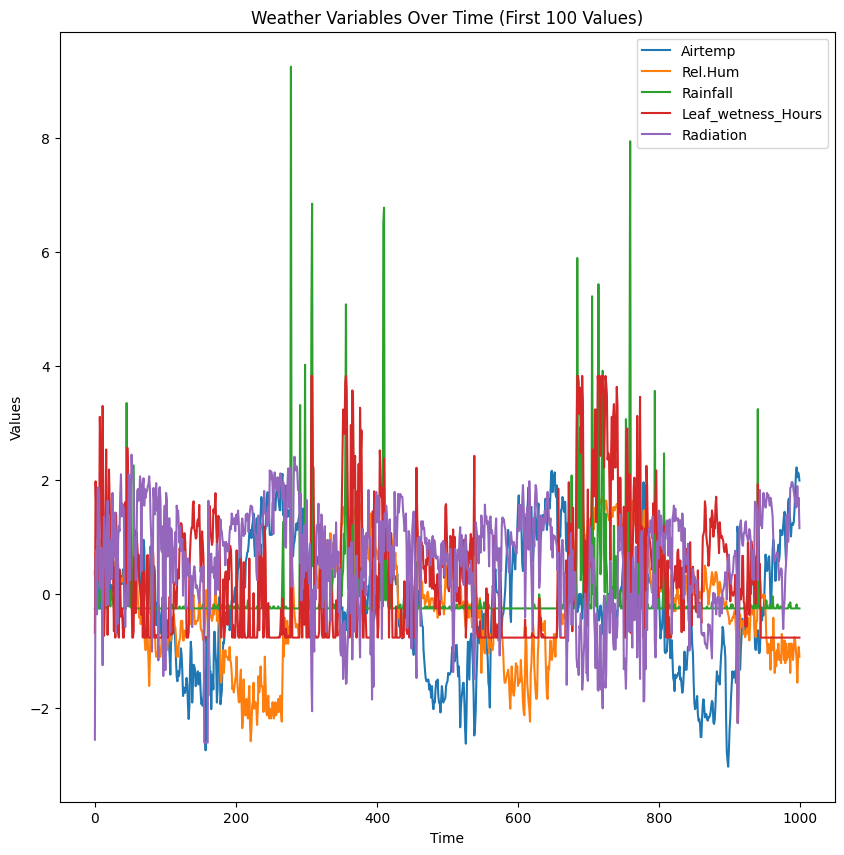

In [24]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Assuming X_train_scaled is a NumPy array after scaling

plt.plot(X[:1000, 0], label='Airtemp')
plt.plot(X[:1000, 1], label='Rel.Hum')
plt.plot(X[:1000, 2], label='Rainfall')
plt.plot(X[:1000, 3], label='Leaf_wetness_Hours')
plt.plot(X[:1000, 4], label='Radiation')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Weather Variables Over Time (First 100 Values)')
plt.legend()
plt.show()


# Split Data

In [25]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Display the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2816, 5)
X_test shape: (704, 5)
y_train shape: (2816,)
y_test shape: (704,)


In [26]:
data.columns

Index(['Airtemp', 'Rel.Hum', 'Rainfall', 'Leaf_wetness_Hours', 'Radiation',
       'Bacterial leaf spot', 'Alternariablight', 'Powdery mildew',
       'Rhizopusrot', 'Downy mildew', 'Girdle beetle'],
      dtype='object')

# Apply SVM 

In [27]:

model = SVC(kernel='linear')


# training data

In [28]:
model.fit(X_train, y_train)

SVC(kernel='linear')

# Make predictions on the test set

In [29]:

predictions = model.predict(X_test)

In [30]:
# print(predictions)

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9460227272727273


# accuracy on the training data

In [32]:

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [33]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9598721590909091


# accuracy score on the testing data

In [34]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [35]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9460227272727273


In [36]:
model.score(X_train, y_train)


0.9598721590909091

In [37]:
model.score(X_test, y_test)

0.9460227272727273

# confusion_matrix

In [38]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[645  12]
 [ 26  21]]


# Generate classification report


In [40]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       657
           1       0.64      0.45      0.52        47

    accuracy                           0.95       704
   macro avg       0.80      0.71      0.75       704
weighted avg       0.94      0.95      0.94       704



In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)




Precision: 0.9395618818588267
Recall: 0.9460227272727273
F1-score: 0.9415842346659364


# Random Input 

In [42]:
# Collect input from the user
Airtemp = float(input("Enter the value for Airtemp: "))
Rel_Hum = float(input("Enter the value for Rel.Hum: "))
Rainfall = float(input("Enter the value for Rainfall: "))
Leaf_wetness_Hours = float(input("Enter the value for Leaf_wetness_Hours: "))
Radiation = float(input("Enter the value for Radiation: "))


input_features = [[Airtemp, Rel_Hum, Rainfall, Leaf_wetness_Hours, Radiation]]  # Assuming your model expects a 2D array
predictions = model.predict(input_features)

# Display the predictions
print("Predicted class:", predictions[0])

# Assuming 'target_column_name' contains the name of the target variable (y)
if predictions[0] == 1:
    print("There is chance of Bacterial leaf spot")
else:
    print("There is no significant chance of Bacterial leaf spot.")


    #27.3 	54.0 	1.0 	11.00 	151.546572 	


Enter the value for Airtemp:  25
Enter the value for Rel.Hum:  20
Enter the value for Rainfall:  0
Enter the value for Leaf_wetness_Hours:  2
Enter the value for Radiation:  50


Predicted class: 0
There is no significant chance of Bacterial leaf spot.


In [49]:

input_features = [[ 28 , 54 , 1.0 ,	11 ,	151.546572]]  
predictions = model.predict(input_features)

# Display the predictions
print("Predicted class:", predictions[0])

if predictions[0] == 1:
    print("There is chance of Bacterial leaf spot")
else:
    print("There is no significant chance of Bacterial leaf spot.")


    


Predicted class: 1
There is chance of Bacterial leaf spot
